variational classifier is also called quantum parameterized circuits or quantum neural networks.
The algorithm contains few ingredients:
1. A circuit ansatz ( the architecture of the circuit)
2. cost function 
3. Training procedure ( gradient descent/ update circuit parameter) 




In [5]:
!pip install pennylane

Data visualization & Preprocessing

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain 

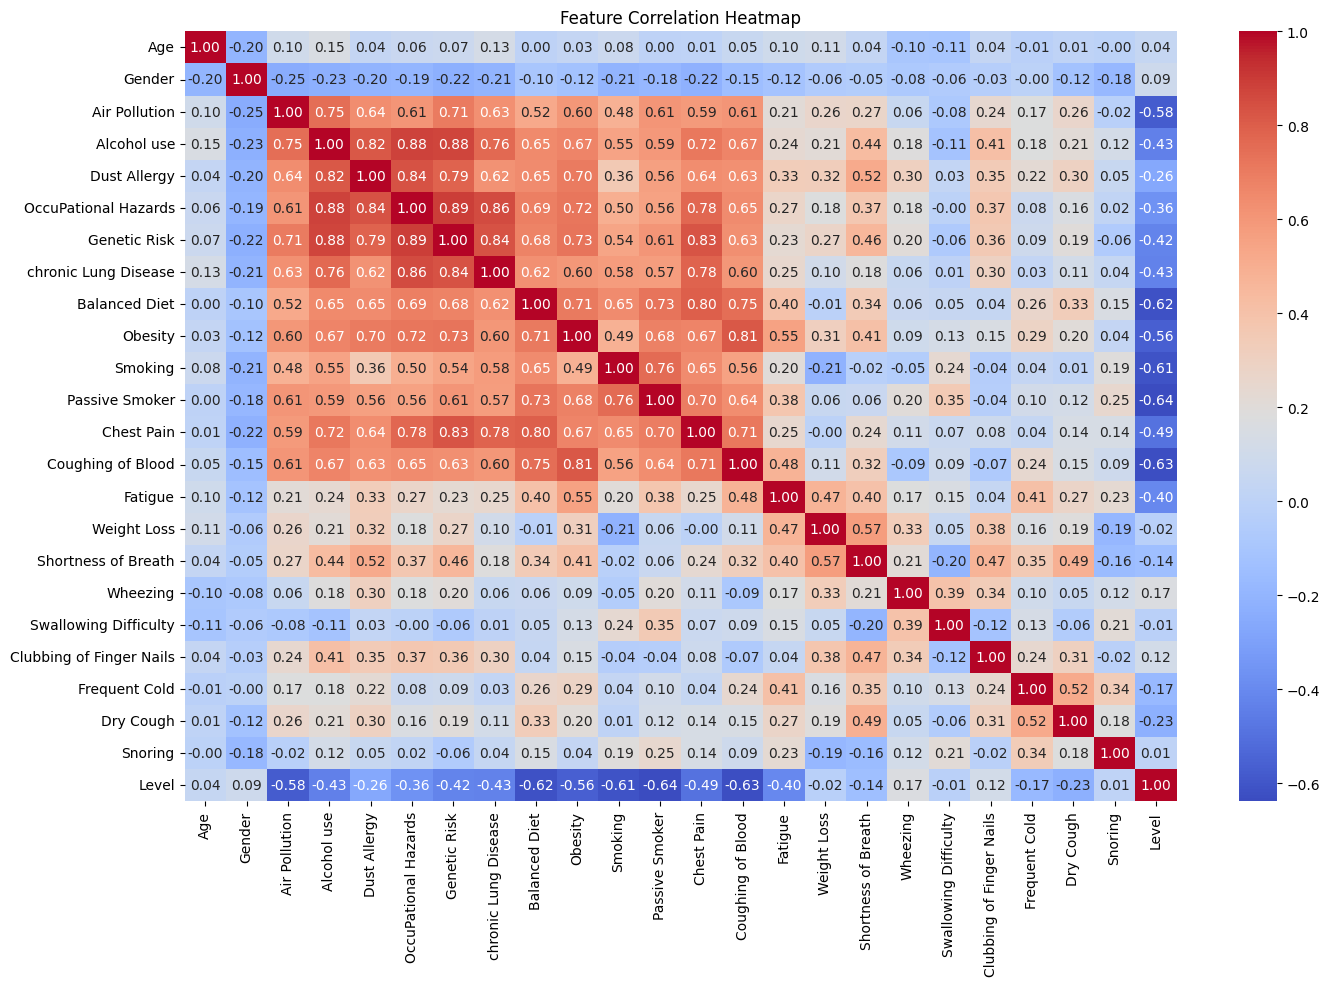


Highly correlated features to drop: set()

Data split completed:
Training set size: (800, 23)
Testing set size: (200, 23)


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\KAJ - Copy\\content\\cancer.csv', sep=',')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Drop irrelevant columns
df.drop(['index', 'Patient Id'], axis=1, inplace=True)

# Encode the categorical target variable if it is categorical
if df['Level'].dtype == 'object':
    le = LabelEncoder()
    df['Level'] = le.fit_transform(df['Level'])
    print(f"Target encoding mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Normalize feature values to a range (0 to 1)
scaler = MinMaxScaler()

# Select features for normalization (excluding the target)
features = df.drop(['Level'], axis=1).columns

df[features] = scaler.fit_transform(df[features])

print("\nFirst five rows after normalization:")
print(df.head())

# Perform correlation analysis to eliminate highly correlated features
plt.figure(figsize=(16, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Set a correlation threshold (e.g., 0.9)
correlation_threshold = 0.9
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(correlation_matrix.columns[i])

print(f"\nHighly correlated features to drop: {correlated_features}")

# Drop correlated features
df.drop(columns=list(correlated_features), inplace=True)

# Split the data into training and testing sets
X = df.drop('Level', axis=1)
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split completed:")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Missing values per column:
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


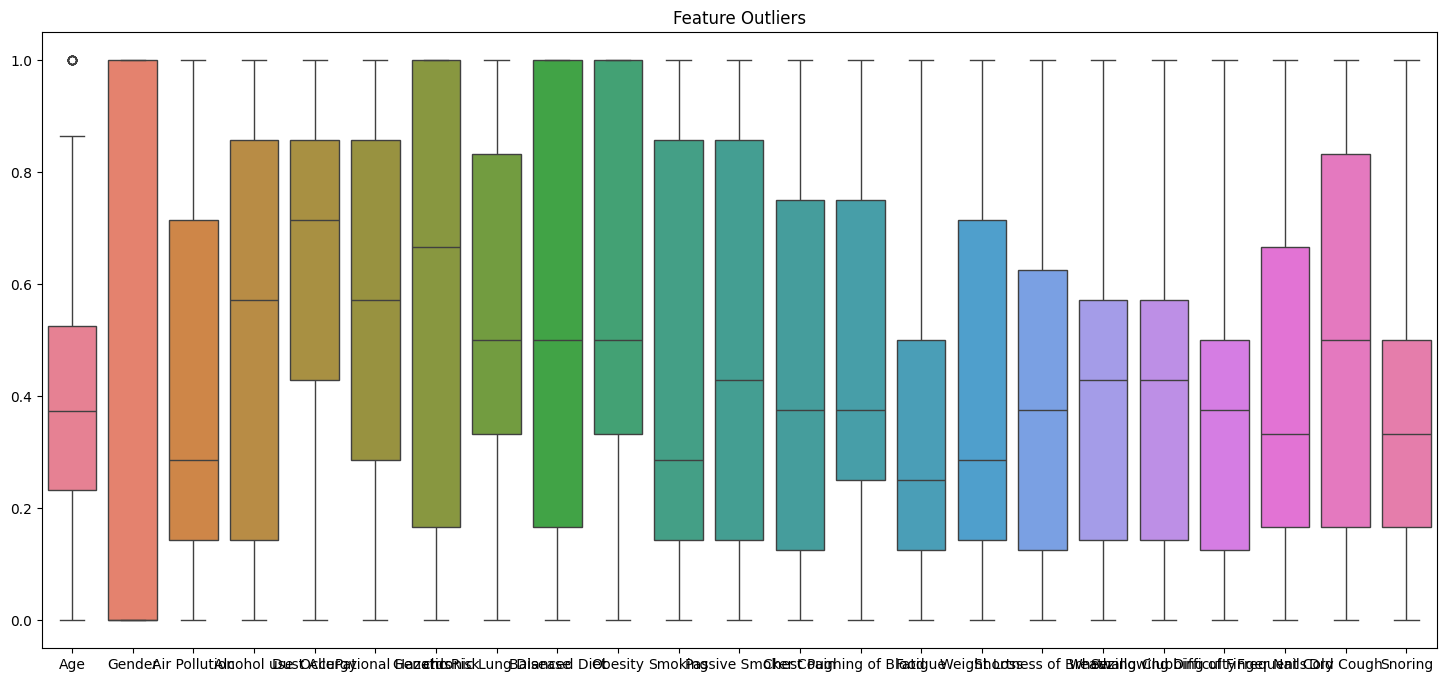

In [7]:
from sklearn.feature_selection import VarianceThreshold
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handling missing values (example: imputation)
df.fillna(df.mean(), inplace=True)  # Numerical features imputed with mean
# Visualize outliers using boxplots
plt.figure(figsize=(18, 8))
sns.boxplot(data=df.drop('Level', axis=1))
plt.title('Feature Outliers')
plt.show()

# Example: Remove outliers using Z-score (threshold = 3)
#from scipy.stats import zscore
#df = df[(np.abs(zscore(df.drop('Level', axis=1))) < 3).all(axis=1)]
#print(f"\nDataset size after outlier removal: {df.shape}")
# Check for duplicate rows
#duplicates = df.duplicated().sum()
#print(f"\nNumber of duplicate rows: {duplicates}")#

# Drop duplicate rows if found
#if duplicates > 0:
    #df.drop_duplicates(inplace=True)
    #print(f"Dataset size after dropping duplicates: {df.shape}")

# Threshold set to a very small value to remove near-constant features
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

#print(f"\nNumber of features after variance thresholding: {X_reduced.shape[1]}")



Classical Machine Learning Baseline 


Logistic Regression Performance:
Accuracy: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0
Confusion Matrix:
[[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Random Forest Performance:
Accuracy: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0
Confusion Matrix:
[[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00

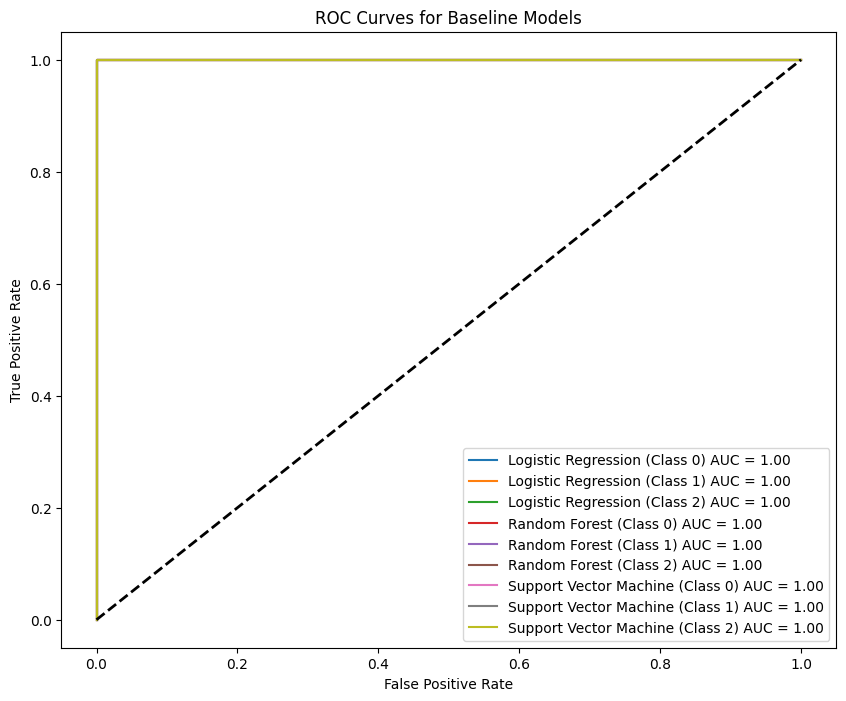

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, label_binarize(y_pred, classes=np.unique(y_test)), average='macro', multi_class='ovr') if y_pred_proba is not None else "N/A"
    
    results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "AUC-ROC": roc_auc
    }

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc if roc_auc != 'N/A' else 'N/A'}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Plot ROC curves if probabilities are available
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i, class_label in enumerate(np.unique(y_test)):
            fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test))[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'{model_name} (Class {class_label}) AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Baseline Models')
plt.legend(loc="lower right")
plt.show()



In [9]:
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} 5-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Logistic Regression 5-Fold Cross-Validation Accuracy: 0.9925
Random Forest 5-Fold Cross-Validation Accuracy: 1.0000
Support Vector Machine 5-Fold Cross-Validation Accuracy: 1.0000


QML starts

In [10]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install qiskit --upgrade


  Using cached qiskit-1.4.0-cp39-abi3-win_amd64.whl.metadata (12 kB)
Using cached qiskit-1.4.0-cp39-abi3-win_amd64.whl (6.5 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.2.4
    Uninstalling qiskit-1.2.4:
      Successfully uninstalled qiskit-1.2.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pennylane-qiskit 0.40.0 requires qiskit<1.3,>=0.32, but you have qiskit 1.4.0 which is incompatible.


Feature Transformation for Quantum Algorithms

First 5 rows after normalization:
         0    1         2         3         4         5         6         7   \
0  0.322034  0.0  0.142857  0.428571  0.571429  0.428571  0.333333  0.166667   
1  0.050847  0.0  0.285714  0.000000  0.571429  0.285714  0.500000  0.166667   
2  0.355932  0.0  0.428571  0.571429  0.714286  0.571429  0.666667  0.500000   
3  0.389831  0.0  0.857143  0.857143  0.857143  0.857143  0.833333  1.000000   
4  0.542373  0.0  0.714286  1.000000  0.857143  0.857143  1.000000  0.833333   

         8         9   ...     13     14        15     16        17        18  \
0  0.166667  0.500000  ...  0.375  0.250  0.428571  0.125  0.142857  0.285714   
1  0.166667  0.166667  ...  0.250  0.000  0.285714  0.750  1.000000  0.714286   
2  0.833333  1.000000  ...  0.875  0.875  0.857143  1.000  0.142857  0.000000   
3  1.000000  1.000000  ...  0.875  0.375  0.142857  0.250  0.000000  0.428571   
4  1.000000  1.000000  ...  1.000  0.250  0.142857  0.375  0.000000  0.428571   

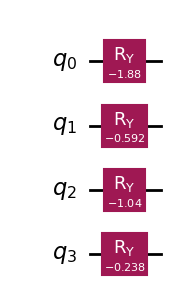

In [12]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from qiskit import QuantumCircuit

# Drop the target column and scale features to the range (0, 1)
features = df.drop(['Level'], axis=1)
target = df['Level']

# Normalize the features for quantum encoding (amplitude or basis encoding)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

print("First 5 rows after normalization:")
print(pd.DataFrame(features_scaled).head())

### **Step 1: Dimensionality Reduction using PCA**
# Number of principal components to match available qubits (set to 4 as an example)
n_qubits = 4
pca = PCA(n_components=n_qubits)
features_pca = pca.fit_transform(features_scaled)

print("\nFirst 5 rows after PCA Transformation:")
print(pd.DataFrame(features_pca))

### **Step 2: Feature Encoding for Quantum Circuits**
# Amplitude encoding: Normalize the PCA-transformed features to form valid quantum states
def normalize_features_for_amplitude_encoding(features):
    norm = np.linalg.norm(features, axis=1, keepdims=True)
    return features / norm

encoded_features = normalize_features_for_amplitude_encoding(features_pca)

print("\nFirst 5 rows of amplitude-encoded features:")
print(pd.DataFrame(encoded_features))

### Example: Quantum Circuit for Encoding 4 Features using Basis Encoding
def create_quantum_circuit(features):
    n_qubits = len(features)
    circuit = QuantumCircuit(n_qubits)
    
    # Apply Ry rotations to each qubit for basis encoding
    for i in range(n_qubits):
        circuit.ry(2 * np.arcsin(features[i]), i)  # Ry encoding
    
    return circuit

# Display a sample quantum circuit for the first encoded feature set
circuit = create_quantum_circuit(encoded_features[0])
print("\nQuantum Circuit for First Data Point:")
print(circuit)
circuit.draw('mpl')


In [13]:
pip install pennylane qiskit matplotlib torch


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pennylane tensorflow qiskit pylatexenc


Note: you may need to restart the kernel to use updated packages.


Quantum Circuit Design

In [15]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


# Number of qubits
n_qubits = 4  # Using 4 qubits since PCA reduced features to 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    """Quantum circuit that encodes data and applies variational layers"""
    # Encoding the input features into quantum states
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)  # Basis encoding using rotation gates

    # Variational layers
    for layer in range(weights.shape[0]):
        for i in range(n_qubits):
            qml.RY(weights[layer, i], wires=i)
            qml.CNOT(wires=[i, (i + 1) % n_qubits])  # Entanglement
    
    return qml.expval(qml.PauliZ(0))  # Measure expectation value

X_torch = torch.tensor(encoded_features, dtype=torch.float32)
y_torch = torch.tensor(target.values, dtype=torch.float32)


class QuantumClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(2, n_qubits))  # Trainable quantum weights

    def forward(self, x):
        return quantum_circuit(x, self.weights)  # Forward pass through quantum circuit

# Initialize model
model = QuantumClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()



In [16]:
pip install pennylane pennylane-qiskit torch numpy


  Using cached qiskit-1.2.4-cp38-abi3-win_amd64.whl.metadata (13 kB)
Using cached qiskit-1.2.4-cp38-abi3-win_amd64.whl (4.6 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.4.0
    Uninstalling qiskit-1.4.0:
      Successfully uninstalled qiskit-1.4.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


Variational quantum classifier 1

In [ ]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

n_qubits = 4  # Using 4 qubits since PCA reduced features to 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    """Quantum Variational Classifier Circuit"""
    # Encoding: Encode input features into quantum states
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)  

    # Variational layers: Trainable quantum gates
    for layer in range(weights.shape[0]):
        for i in range(n_qubits):
            qml.RY(weights[layer, i], wires=i)  # Trainable rotations
            qml.CNOT(wires=[i, (i + 1) % n_qubits])  # Entanglement
    
    return qml.expval(qml.PauliZ(0))  # Measure the expectation value

class QuantumVariationalClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(2, n_qubits))  # Trainable quantum parameters

    def forward(self, x):
        return torch.stack([quantum_circuit(xi, self.weights) for xi in x])  # Process each sample separately



# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float64)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float64)
X_test_torch = torch.tensor(X_test, dtype=torch.float64)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float64)




# Initialize model, loss function, and optimizer
model = QuantumVariationalClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()  # Mean Squared Error for regression-based classification

# Training loop
# Training loop
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(X_train_torch).squeeze()  # Ensure shape matches y_train_torch
    loss = loss_fn(predictions, y_train_torch)
    loss.backward()
    optimizer.step()

    # Compute train accuracy
    predicted_labels = (predictions >= 0.5).double()
    true_labels = y_train_torch.double()
    correct = (predicted_labels == true_labels).sum().item()
    total = y_train_torch.size(0)
    accuracy = correct / total * 100

    print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Train Accuracy = {accuracy:.2f}%")



# Evaluate on test data
with torch.no_grad():  # Disable gradient computation for evaluation
    test_predictions = model(X_test_torch).squeeze()
    test_pred_labels = (test_predictions >= 0.5).double()
    test_true_labels = y_test_torch.double()

    correct_test = (test_pred_labels == test_true_labels).sum().item()
    total_test = y_test_torch.size(0)
    test_accuracy = correct_test / total_test * 100

    print(f"Test Accuracy: {test_accuracy:.2f}%")


QuantumFunctionError: A quantum function must return either a single measurement, or a nonempty sequence of measurements.

Hyper-parameter tuning

In [18]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import itertools
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define hyperparameter search space
learning_rates = [0.01, 0.005, 0.001]
batch_sizes = [16, 32, 64]
num_layers = [1, 2, 3]
num_qubits = [4, 6, 8]

# Quantum Device
n_qubits = max(num_qubits)
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum Circuit
def create_quantum_circuit(n_qubits, n_layers):
    @qml.qnode(dev, interface="torch")
    def quantum_circuit(inputs, weights):
        qml.templates.AngleEmbedding(inputs, wires=range(n_qubits), rotation="Y")
        for layer in range(n_layers):
            for i in range(n_qubits):
                qml.RX(weights[layer, i], wires=i)
                qml.RY(weights[layer, i], wires=i)
                qml.RZ(weights[layer, i], wires=i)
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]
    return quantum_circuit

# Quantum Neural Network Class
class QuantumNN(nn.Module):
    def __init__(self, n_classes, n_qubits, n_layers):
        super().__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits))
        self.fc = nn.Linear(n_qubits, n_classes)
        self.dropout = nn.Dropout(0.2)
        self.quantum_circuit = create_quantum_circuit(n_qubits, n_layers)

    def forward(self, x):
        x = self.dropout(x)
        x = torch.stack([torch.tensor(self.quantum_circuit(xi, self.weights), dtype=torch.float32) for xi in x])
        x = self.fc(x)
        return torch.softmax(x, dim=1)

# Prepare dataset (Assuming `encoded_features` and `target` are defined)
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Hyperparameter tuning
results = []
for lr, batch_size, layers, qubits in itertools.product(learning_rates, batch_sizes, num_layers, num_qubits):
    print(f"Training with lr={lr}, batch_size={batch_size}, layers={layers}, qubits={qubits}")
    
    # DataLoader
    train_data = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long))
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    
    model = QuantumNN(n_classes=3, n_qubits=qubits, n_layers=layers)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.001)
    loss_fn = nn.CrossEntropyLoss()
    
    # Training Loop
    for epoch in range(201):
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            predictions = model(batch_x)
            loss = loss_fn(predictions, batch_y)
            loss.backward()
            optimizer.step()
    
    # Evaluation
    with torch.no_grad():
        test_predictions = model(torch.tensor(X_test, dtype=torch.float32))
        test_pred_labels = torch.argmax(test_predictions, dim=1)
        
        acc = accuracy_score(y_test, test_pred_labels)
        prec = precision_score(y_test, test_pred_labels, average='weighted')
        rec = recall_score(y_test, test_pred_labels, average='weighted')
        f1 = f1_score(y_test, test_pred_labels, average='weighted')
    
    # Save results
    results.append([lr, batch_size, layers, qubits, acc, prec, rec, f1, loss.item()])

# Save results to Excel
df_results = pd.DataFrame(results, columns=["Learning Rate", "Batch Size", "Layers", "Qubits", "Accuracy", "Precision", "Recall", "F1-score", "Loss"])
df_results.to_excel("hyperparameter_tuning_results.xlsx", index=False)
print("Hyperparameter tuning complete. Results saved to Excel.")


Training with lr=0.01, batch_size=16, layers=1, qubits=4
Training with lr=0.01, batch_size=16, layers=1, qubits=6
Training with lr=0.01, batch_size=16, layers=1, qubits=8
Training with lr=0.01, batch_size=16, layers=2, qubits=4
Training with lr=0.01, batch_size=16, layers=2, qubits=6
Training with lr=0.01, batch_size=16, layers=2, qubits=8
Training with lr=0.01, batch_size=16, layers=3, qubits=4
Training with lr=0.01, batch_size=16, layers=3, qubits=6
Training with lr=0.01, batch_size=16, layers=3, qubits=8
Training with lr=0.01, batch_size=32, layers=1, qubits=4
Training with lr=0.01, batch_size=32, layers=1, qubits=6
Training with lr=0.01, batch_size=32, layers=1, qubits=8


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.01, batch_size=32, layers=2, qubits=4
Training with lr=0.01, batch_size=32, layers=2, qubits=6
Training with lr=0.01, batch_size=32, layers=2, qubits=8
Training with lr=0.01, batch_size=32, layers=3, qubits=4
Training with lr=0.01, batch_size=32, layers=3, qubits=6
Training with lr=0.01, batch_size=32, layers=3, qubits=8
Training with lr=0.01, batch_size=64, layers=1, qubits=4
Training with lr=0.01, batch_size=64, layers=1, qubits=6
Training with lr=0.01, batch_size=64, layers=1, qubits=8
Training with lr=0.01, batch_size=64, layers=2, qubits=4
Training with lr=0.01, batch_size=64, layers=2, qubits=6
Training with lr=0.01, batch_size=64, layers=2, qubits=8
Training with lr=0.01, batch_size=64, layers=3, qubits=4
Training with lr=0.01, batch_size=64, layers=3, qubits=6
Training with lr=0.01, batch_size=64, layers=3, qubits=8
Training with lr=0.005, batch_size=16, layers=1, qubits=4
Training with lr=0.005, batch_size=16, layers=1, qubits=6
Training with lr=0.005, batch

c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=16, layers=2, qubits=8
Training with lr=0.001, batch_size=16, layers=3, qubits=4


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=16, layers=3, qubits=6
Training with lr=0.001, batch_size=16, layers=3, qubits=8


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=32, layers=1, qubits=4
Training with lr=0.001, batch_size=32, layers=1, qubits=6


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=32, layers=1, qubits=8


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=32, layers=2, qubits=4
Training with lr=0.001, batch_size=32, layers=2, qubits=6


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=32, layers=2, qubits=8


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=32, layers=3, qubits=4
Training with lr=0.001, batch_size=32, layers=3, qubits=6
Training with lr=0.001, batch_size=32, layers=3, qubits=8
Training with lr=0.001, batch_size=64, layers=1, qubits=4


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=64, layers=1, qubits=6
Training with lr=0.001, batch_size=64, layers=1, qubits=8
Training with lr=0.001, batch_size=64, layers=2, qubits=4
Training with lr=0.001, batch_size=64, layers=2, qubits=6
Training with lr=0.001, batch_size=64, layers=2, qubits=8


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=64, layers=3, qubits=4


c:\Users\USER\anaconda3\envs\atik\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with lr=0.001, batch_size=64, layers=3, qubits=6
Training with lr=0.001, batch_size=64, layers=3, qubits=8
Hyperparameter tuning complete. Results saved to Excel.


VQC VARIATIONAL QUANTUM CLASSIFIER

Epoch 10/100, Loss: 1.1594, Train Accuracy: 33.62%
Epoch 20/100, Loss: 1.1396, Train Accuracy: 33.62%
Epoch 30/100, Loss: 1.1249, Train Accuracy: 33.62%
Epoch 40/100, Loss: 1.1143, Train Accuracy: 33.62%
Epoch 50/100, Loss: 1.1068, Train Accuracy: 34.12%
Epoch 60/100, Loss: 1.1018, Train Accuracy: 36.62%
Epoch 70/100, Loss: 1.0985, Train Accuracy: 34.62%
Epoch 80/100, Loss: 1.0963, Train Accuracy: 37.12%
Epoch 90/100, Loss: 1.0946, Train Accuracy: 36.62%
Epoch 100/100, Loss: 1.0932, Train Accuracy: 30.75%

Test Accuracy: 27.00%
Precision: 0.4823, Recall: 0.2700, F1-score: 0.2247
Model saved as 'VQC_model.pth'.
Results saved to 'VQC_results.xlsx'.


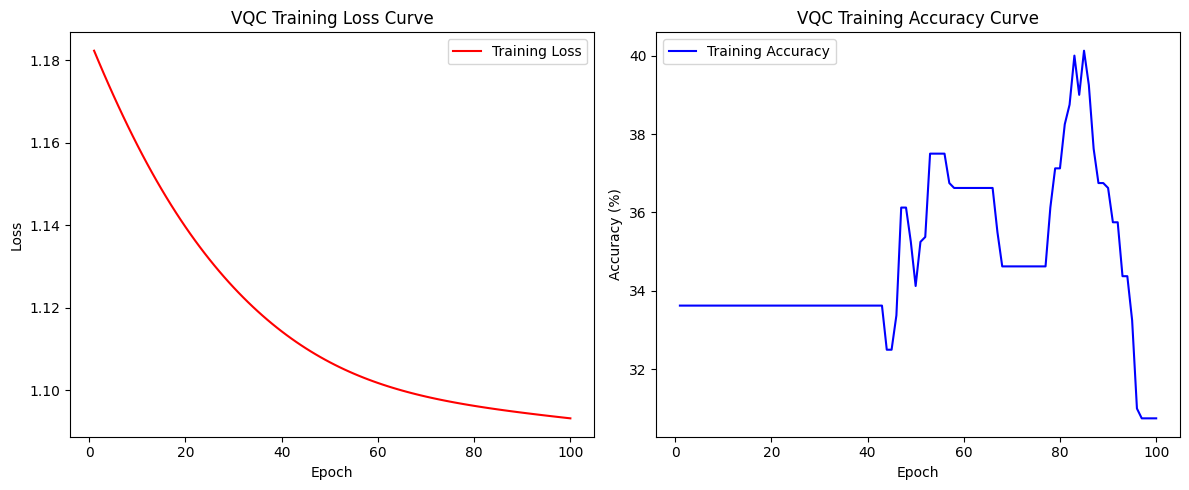

In [42]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Hyperparameters ---
learning_rate = 0.001
batch_size = 64
num_layers = 3
num_qubits = 8
num_classes = 3  # Assuming 3-class classification
num_epochs = 100

# --- Quantum Device Setup ---
dev = qml.device("default.qubit", wires=num_qubits)

# --- Define Quantum Circuit ---
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    """Quantum Variational Classifier Circuit"""
    qml.AngleEmbedding(inputs, wires=range(num_qubits), rotation="Y")  # Encode inputs
    for layer in range(weights.shape[0]):  # Variational layers
        for i in range(num_qubits):
            qml.RY(weights[layer, i], wires=i)
            qml.CNOT(wires=[i, (i + 1) % num_qubits])  # Entanglement
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]  # Ensure correct shape

# --- Quantum Neural Network ---
class QuantumVariationalClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(num_layers, num_qubits))  # Trainable quantum parameters
        self.fc = nn.Linear(num_qubits, num_classes)  # Fully connected layer (matches num_qubits output)

    def forward(self, x):
        x = torch.stack([torch.tensor(quantum_circuit(xi, self.weights), dtype=torch.float32) for xi in x])
        return self.fc(x)  # Correct shape: (batch_size, num_classes)

# --- Load & Preprocess Data ---
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)  # CrossEntropyLoss expects LongTensor
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

# --- Initialize Model, Optimizer & Loss ---
model = QuantumVariationalClassifier()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()  # Multi-class classification loss

# --- Training Loop ---
loss_values, accuracy_values = [], []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_torch)  # Direct logits output
    loss = loss_fn(outputs, y_train_torch)  # CrossEntropyLoss applies softmax internally
    loss.backward()
    optimizer.step()

    # Compute train accuracy
    predicted_labels = torch.argmax(outputs, dim=1)
    accuracy = accuracy_score(y_train_torch.numpy(), predicted_labels.numpy()) * 100

    loss_values.append(loss.item())
    accuracy_values.append(accuracy)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Accuracy: {accuracy:.2f}%")

# --- Evaluation ---
with torch.no_grad():
    test_outputs = model(X_test_torch)
    test_pred_labels = torch.argmax(test_outputs, dim=1)

    test_accuracy = accuracy_score(y_test_torch.numpy(), test_pred_labels.numpy()) * 100
    test_precision = precision_score(y_test_torch.numpy(), test_pred_labels.numpy(), average='weighted', zero_division=1)
    test_recall = recall_score(y_test_torch.numpy(), test_pred_labels.numpy(), average='weighted')
    test_f1 = f1_score(y_test_torch.numpy(), test_pred_labels.numpy(), average='weighted')

print(f"\nTest Accuracy: {test_accuracy:.2f}%")
print(f"Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")

# --- Save Model ---
torch.save(model.state_dict(), "VQC_model.pth")
print("Model saved as 'VQC_model.pth'.")

# --- Save Results to Excel ---
results_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Value": [test_accuracy, test_precision, test_recall, test_f1]
})
results_df.to_excel("VQC_results.xlsx", index=False)
print("Results saved to 'VQC_results.xlsx'.")

# --- Plot Training Loss & Accuracy ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_values, label="Training Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VQC Training Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracy_values, label="Training Accuracy", color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("VQC Training Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()


QNN-DR(not hybrid)

Epoch 10/100, Loss: 1.1359, Train Accuracy: 31.00%
Epoch 20/100, Loss: 1.1283, Train Accuracy: 31.00%
Epoch 30/100, Loss: 1.1219, Train Accuracy: 31.00%
Epoch 40/100, Loss: 1.1167, Train Accuracy: 34.12%
Epoch 50/100, Loss: 1.1126, Train Accuracy: 34.00%
Epoch 60/100, Loss: 1.1092, Train Accuracy: 35.88%
Epoch 70/100, Loss: 1.1064, Train Accuracy: 42.25%
Epoch 80/100, Loss: 1.1039, Train Accuracy: 35.38%
Epoch 90/100, Loss: 1.1017, Train Accuracy: 30.25%
Epoch 100/100, Loss: 1.0995, Train Accuracy: 31.25%

Test Accuracy: 26.50%
Precision: 0.2400, Recall: 0.2650, F1-score: 0.2358
Model saved as 'QNN_DR_model.pth'.
Results saved to 'QNN_DR_results.xlsx'.


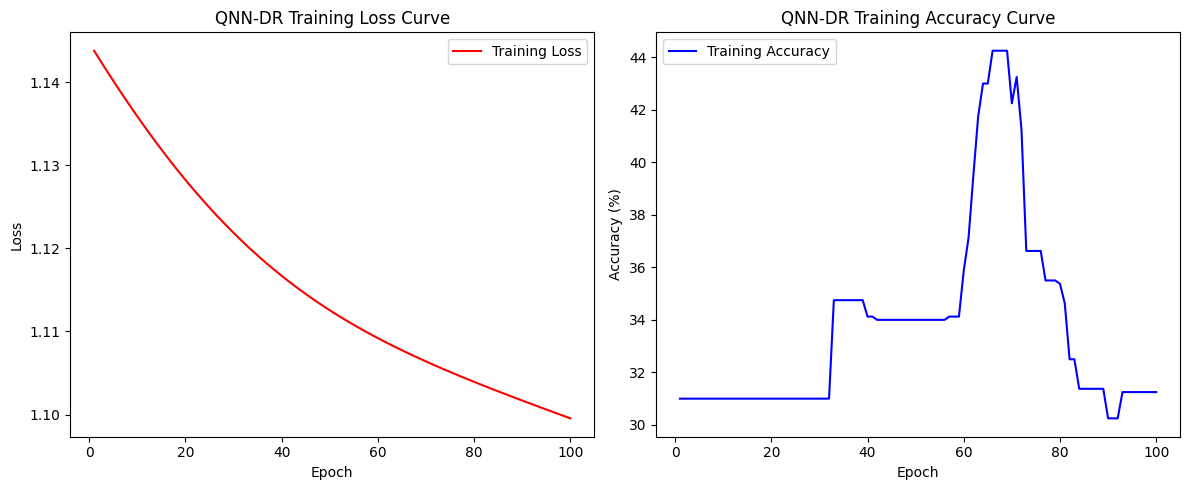

In [22]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Hyperparameters (Best from Tuning) ---
learning_rate = 0.001
batch_size = 64
num_layers = 3
num_qubits = 8
num_classes = 3  # Assuming multi-class classification
num_epochs = 100

# --- Quantum Device Setup ---
dev = qml.device("default.qubit", wires=num_qubits)

# --- Define Quantum Circuit with Data Re-uploading ---
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    """Quantum Neural Network with Data Re-uploading"""
    for layer in range(num_layers):  # Data Re-uploading Layers
        qml.AngleEmbedding(inputs, wires=range(num_qubits), rotation="Y")
        for i in range(num_qubits):
            qml.RX(weights[layer, i], wires=i)
            qml.RY(weights[layer, i], wires=i)
            qml.RZ(weights[layer, i], wires=i)
        for i in range(num_qubits):
            qml.CNOT(wires=[i, (i + 1) % num_qubits])  # Entanglement
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]  # Measure all qubits

# --- Quantum Neural Network Class ---
class QNN_DR(nn.Module):
    def __init__(self):
        super(QNN_DR, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(num_layers, num_qubits))  # Trainable quantum parameters
        self.fc = nn.Linear(num_qubits, num_classes)  # Fully connected layer

    def forward(self, x):
        x = torch.stack([torch.tensor(quantum_circuit(xi, self.weights), dtype=torch.float32) for xi in x])
        return self.fc(x)  # Outputs logits

# --- Load & Preprocess Data ---
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)  # CrossEntropyLoss requires LongTensor
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

# --- Initialize Model, Optimizer & Loss ---
model = QNN_DR()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
loss_fn = nn.CrossEntropyLoss()  # Multi-class classification loss

# --- Training Loop ---
train_losses, train_accuracies = [], []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_torch)  # Direct logits output
    loss = loss_fn(outputs, y_train_torch)  # CrossEntropyLoss applies softmax internally
    loss.backward()
    optimizer.step()

    # Compute train accuracy
    predicted_labels = torch.argmax(outputs, dim=1)
    accuracy = accuracy_score(y_train_torch.numpy(), predicted_labels.numpy()) * 100

    train_losses.append(loss.item())
    train_accuracies.append(accuracy)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Accuracy: {accuracy:.2f}%")

# --- Evaluation ---
with torch.no_grad():
    test_outputs = model(X_test_torch)
    test_pred_labels = torch.argmax(test_outputs, dim=1)

    test_accuracy = accuracy_score(y_test_torch.numpy(), test_pred_labels.numpy()) * 100
    test_precision = precision_score(y_test_torch.numpy(), test_pred_labels.numpy(), average='weighted', zero_division=1)
    test_recall = recall_score(y_test_torch.numpy(), test_pred_labels.numpy(), average='weighted')
    test_f1 = f1_score(y_test_torch.numpy(), test_pred_labels.numpy(), average='weighted')

print(f"\nTest Accuracy: {test_accuracy:.2f}%")
print(f"Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")

# --- Save Model ---
torch.save(model.state_dict(), "QNN_DR_model.pth")
print("Model saved as 'QNN_DR_model.pth'.")

# --- Save Results to Excel ---
results_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Value": [test_accuracy, test_precision, test_recall, test_f1]
})
results_df.to_excel("QNN_DR_results.xlsx", index=False)
print("Results saved to 'QNN_DR_results.xlsx'.")

# --- Plot Training Loss & Accuracy ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("QNN-DR Training Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Training Accuracy", color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("QNN-DR Training Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()


VQBM (not hybrid)

Epoch 10/100, Loss: 2.9590
Epoch 20/100, Loss: 2.9402
Epoch 30/100, Loss: 2.9215
Epoch 40/100, Loss: 2.9030
Epoch 50/100, Loss: 2.8847
Epoch 60/100, Loss: 2.8666
Epoch 70/100, Loss: 2.8487
Epoch 80/100, Loss: 2.8310
Epoch 90/100, Loss: 2.8135
Epoch 100/100, Loss: 2.7963

Final QBM Probabilities: [0.05038222 0.02034166 0.21410641 0.7151696 ]
Model saved as 'VQBM_model.pth'.
Results saved to 'VQBM_results.xlsx'.


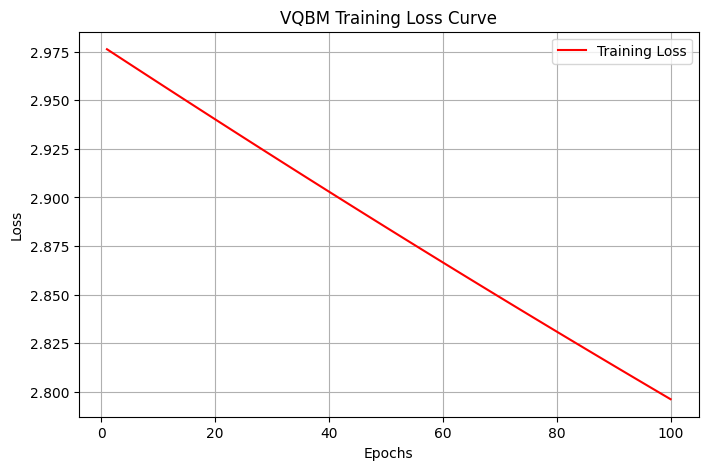

In [23]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# --- Hyperparameters (Best from Tuning) ---
learning_rate = 0.001
batch_size = 64
num_layers = 3  # For future extensibility
num_qubits = 8  # Ensuring this matches input dimension
num_epochs = 100

# --- Data Preprocessing ---
# Ensure n_qubits matches feature count
n_qubits = min(num_qubits, X_train.shape[1])

# Apply PCA if feature count is higher than n_qubits
if X_train.shape[1] > n_qubits:
    print(f"Reducing features using PCA from {X_train.shape[1]} to {n_qubits} qubits.")
    pca = PCA(n_components=n_qubits)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

# Normalize features (0 to 1 scaling)
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train) + 1e-8)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)

# --- Define Quantum Boltzmann Machine (VQBM) ---
class VQBM(nn.Module):
    def __init__(self, n_qubits):
        super(VQBM, self).__init__()
        self.params = nn.Parameter(torch.randn(n_qubits))  # Trainable quantum parameters

    def forward(self):
        return torch.clamp(torch.softmax(self.params, dim=0), min=1e-6)  # Prevent zero probabilities

# --- Initialize Model & Optimizer ---
vqbm = VQBM(n_qubits)
optimizer = optim.Adam(vqbm.parameters(), lr=learning_rate)

# --- KL Divergence Loss Function ---
def kl_divergence(p, q):
    p = torch.clamp(p, min=1e-6)  # Prevent zero values
    q = torch.clamp(q, min=1e-6)
    return torch.sum(p * torch.log(p / q))

# --- Training Loop ---
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    p_data = torch.mean(X_train_torch, dim=0)[:n_qubits]  # Compute data probability distribution
    p_qbm = vqbm()  # Quantum Boltzmann output

    loss = kl_divergence(p_data, p_qbm)

    if torch.isnan(loss) or torch.isinf(loss):  # Safety check
        print(f"Warning: NaN detected in loss at epoch {epoch+1}, skipping update.")
        continue

    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# --- Model Evaluation ---
with torch.no_grad():
    p_qbm_final = vqbm()
    print("\nFinal QBM Probabilities:", p_qbm_final.numpy())

# --- Save Model ---
torch.save(vqbm.state_dict(), "VQBM_model.pth")
print("Model saved as 'VQBM_model.pth'.")

# --- Save Results to Excel ---
results_df = pd.DataFrame({"Epoch": list(range(1, num_epochs + 1)), "Loss": losses})
results_df.to_excel("VQBM_results.xlsx", index=False)
print("Results saved to 'VQBM_results.xlsx'.")

# --- Plot Training Loss ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), losses, label="Training Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("VQBM Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


QNN

Epoch 1/100, Loss: 14.3083
Epoch 2/100, Loss: 14.3109
Epoch 3/100, Loss: 14.2952
Epoch 4/100, Loss: 14.3471
Epoch 5/100, Loss: 14.3146
Epoch 6/100, Loss: 14.2383
Epoch 7/100, Loss: 14.2918
Epoch 8/100, Loss: 14.2778
Epoch 9/100, Loss: 14.3131
Epoch 10/100, Loss: 14.2633
Epoch 11/100, Loss: 14.2612
Epoch 12/100, Loss: 14.2650
Epoch 13/100, Loss: 14.2558
Epoch 14/100, Loss: 14.2392
Epoch 15/100, Loss: 14.2070
Epoch 16/100, Loss: 14.1980
Epoch 17/100, Loss: 14.2685
Epoch 18/100, Loss: 14.2735
Epoch 19/100, Loss: 14.2281
Epoch 20/100, Loss: 14.2377
Epoch 21/100, Loss: 14.2022
Epoch 22/100, Loss: 14.2121
Epoch 23/100, Loss: 14.2233
Epoch 24/100, Loss: 14.1918
Epoch 25/100, Loss: 14.1884
Epoch 26/100, Loss: 14.1748
Epoch 27/100, Loss: 14.1335
Epoch 28/100, Loss: 14.1370
Epoch 29/100, Loss: 14.1736
Epoch 30/100, Loss: 14.1693
Epoch 31/100, Loss: 14.1885
Epoch 32/100, Loss: 14.1232
Epoch 33/100, Loss: 14.1828
Epoch 34/100, Loss: 14.1793
Epoch 35/100, Loss: 14.1578
Epoch 36/100, Loss: 14.1298
E

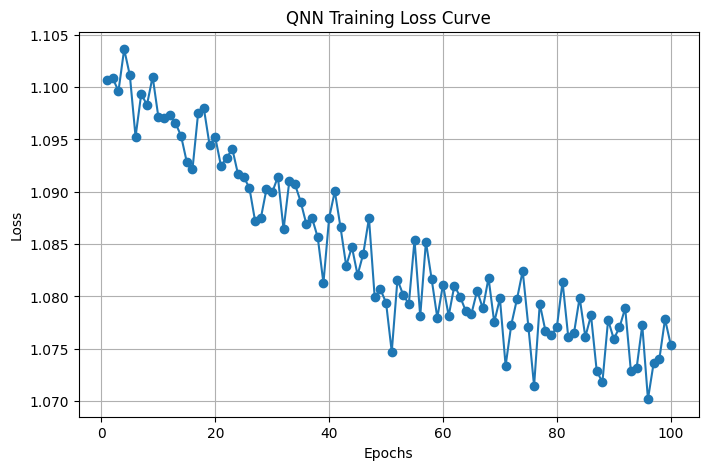

In [24]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Hyperparameters (Best from Tuning) ---
learning_rate = 0.001
batch_size = 64
num_layers = 3
num_qubits = 8
num_epochs = 100
n_classes = 3  # Assuming multi-class classification

# --- Quantum Device ---
dev = qml.device("default.qubit", wires=num_qubits)

# --- Quantum Circuit ---
def quantum_circuit(n_qubits, n_layers):
    @qml.qnode(dev, interface="torch")
    def circuit(inputs, weights):
        qml.templates.AngleEmbedding(inputs, wires=range(n_qubits), rotation="Y")
        for i in range(n_layers):
            for j in range(n_qubits):
                qml.RY(weights[i, j], wires=j)
                qml.RZ(weights[i, j], wires=j)
            for k in range(n_qubits - 1):
                qml.CNOT(wires=[k, k + 1])
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]
    return circuit

# --- Quantum Neural Network (QNN) ---
class QNN(nn.Module):
    def __init__(self, n_classes, n_qubits, n_layers):
        super().__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits))
        self.fc = nn.Linear(n_qubits, n_classes)
        self.dropout = nn.Dropout(0.2)
        self.quantum_circuit = quantum_circuit(n_qubits, n_layers)

    def forward(self, x):
        x = torch.stack([torch.tensor(self.quantum_circuit(xi, self.weights), dtype=torch.float32) for xi in x])
        x = self.dropout(x)
        x = self.fc(x)
        return torch.softmax(x, dim=1)

# --- Prepare Dataset ---
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# DataLoader
train_data = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long))
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# --- Model Initialization ---
model = QNN(n_classes, num_qubits, num_layers)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
loss_fn = nn.CrossEntropyLoss()

# --- Training Loop ---
train_losses = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_x)
        loss = loss_fn(predictions, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# --- Evaluation ---
with torch.no_grad():
    test_predictions = model(torch.tensor(X_test, dtype=torch.float32))
    test_pred_labels = torch.argmax(test_predictions, dim=1)

    acc = accuracy_score(y_test, test_pred_labels)
    prec = precision_score(y_test, test_pred_labels, average='weighted')
    rec = recall_score(y_test, test_pred_labels, average='weighted')
    f1 = f1_score(y_test, test_pred_labels, average='weighted')

# --- Print Evaluation Metrics ---
print("\nEvaluation Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

# --- Save Model ---
torch.save(model.state_dict(), "QNN_model.pth")
print("Model saved as 'QNN_model.pth'.")

# --- Save Results to Excel ---
df_results = pd.DataFrame([[learning_rate, batch_size, num_layers, num_qubits, acc, prec, rec, f1]],
                          columns=["Learning Rate", "Batch Size", "Layers", "Qubits", "Accuracy", "Precision", "Recall", "F1-score"])
df_results.to_excel("QNN_results.xlsx", index=False)
print("Results saved to 'QNN_results.xlsx'.")

# --- Plot Training Loss ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("QNN Training Loss Curve")
plt.grid()
plt.show()


FNN

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
torch.manual_seed(42)

X = np.random.rand(1000, 10).astype(np.float32)
y = (np.sum(X, axis=1) > 5).astype(np.float32)  # Binary classification

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Initialize model, loss function, and optimizer
model = NeuralNet(input_size=10)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')


Epoch [1/50], Loss: 0.7400
Epoch [2/50], Loss: 0.7381
Epoch [3/50], Loss: 0.7362
Epoch [4/50], Loss: 0.7344
Epoch [5/50], Loss: 0.7325
Epoch [6/50], Loss: 0.7307
Epoch [7/50], Loss: 0.7289
Epoch [8/50], Loss: 0.7271
Epoch [9/50], Loss: 0.7253
Epoch [10/50], Loss: 0.7235
Epoch [11/50], Loss: 0.7217
Epoch [12/50], Loss: 0.7200
Epoch [13/50], Loss: 0.7183
Epoch [14/50], Loss: 0.7166
Epoch [15/50], Loss: 0.7149
Epoch [16/50], Loss: 0.7132
Epoch [17/50], Loss: 0.7115
Epoch [18/50], Loss: 0.7098
Epoch [19/50], Loss: 0.7082
Epoch [20/50], Loss: 0.7066
Epoch [21/50], Loss: 0.7049
Epoch [22/50], Loss: 0.7033
Epoch [23/50], Loss: 0.7017
Epoch [24/50], Loss: 0.7002
Epoch [25/50], Loss: 0.6986
Epoch [26/50], Loss: 0.6970
Epoch [27/50], Loss: 0.6954
Epoch [28/50], Loss: 0.6939
Epoch [29/50], Loss: 0.6923
Epoch [30/50], Loss: 0.6908
Epoch [31/50], Loss: 0.6893
Epoch [32/50], Loss: 0.6877
Epoch [33/50], Loss: 0.6862
Epoch [34/50], Loss: 0.6847
Epoch [35/50], Loss: 0.6831
Epoch [36/50], Loss: 0.6816
E

In [ ]:
pip uninstall qiskit qiskit-aer qiskit-machine-learning -y



Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are missing from the target environment:
  - qiskit-machine-learning
  - qiskit
  - qiskit-aer




In [55]:
pip install qiskit


  Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl.metadata (13 kB)
Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl (6.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pennylane-qiskit 0.39.0 requires qiskit-aer, which is not installed.


In [56]:
pip install qiskit-aer

  Using cached qiskit_aer-0.16.1-cp311-cp311-win_amd64.whl.metadata (8.4 kB)
Using cached qiskit_aer-0.16.1-cp311-cp311-win_amd64.whl (9.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install qiskit-machine-learning

  Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl.metadata (13 kB)
Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl (231 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show qiskit


Name: qiskit
Version: 1.3.2
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: c:\Users\USER\anaconda3\Lib\site-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: PennyLane-qiskit, qiskit-aer, qiskit-ibm-provider, qiskit-ibm-runtime, qiskit-machine-learning
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install qiskit-machine-learning==0.8.2


  Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl.metadata (13 kB)
  Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl.metadata (13 kB)
Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl (231 kB)
Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl (6.5 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.45.0
    Uninstalling qiskit-0.45.0:
      Successfully uninstalled qiskit-0.45.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pennylane-qiskit 0.40.0 requires qiskit-aer, which is not installed.
pennylane-qiskit 0.40.0 requires qiskit<1.3,>=0.32, but you have qiskit 1.3.2 which is incompatible.


In [ ]:
pip install qiskit==0.45.0


  Using cached qiskit-0.45.0-py3-none-any.whl.metadata (12 kB)
Using cached qiskit-0.45.0-py3-none-any.whl (9.6 kB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.3.2
    Uninstalling qiskit-1.3.2:
      Successfully uninstalled qiskit-1.3.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-aer 0.16.1 requires qiskit>=1.1.0, but you have qiskit 0.45.0 which is incompatible.
qiskit-ibm-runtime 0.29.0 requires qiskit>=1.1.0, but you have qiskit 0.45.0 which is incompatible.
qiskit-machine-learning 0.8.2 requires qiskit>=1.0, but you have qiskit 0.45.0 which is incompatible.


In [ ]:
pip install qiskit-aer==0.45.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement qiskit-aer==0.45.0 (from versions: 0.1.0, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.4.0, 0.4.1, 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.8.0, 0.8.1, 0.8.2, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.11.0, 0.11.1, 0.11.2, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0.1, 0.14.1, 0.14.2, 0.15.0, 0.15.1, 0.16.0, 0.16.1)
ERROR: No matching distribution found for qiskit-aer==0.45.0


In [ ]:
pip install qiskit-machine-learning==0.7.2


  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/97.8 kB ? eta -:--:--
   ------------ --------------------------- 30.7/97.8 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 97.8/97.8 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/310.5 kB ? eta -:--:--
   --------------- ------------------------ 122.9/310.5 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 310.5/310.5 kB 3.9 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3585 sha256=a6c353af3243a7b98704e39cad52ee279b6c4afa81937f12751c49962a0534c2
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5c\8a\f6\fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw
  Attempting uninstall: qiskit-machine-learning
    Found existing installation: qiskit-ma

In [ ]:
pip install pennylane-qiskit==0.39.0


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install qiskit==1.3.2 qiskit-machine-learning==0.8.2 qiskit-aer


  Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl.metadata (13 kB)
Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl (231 kB)
  Attempting uninstall: qiskit-machine-learning
    Found existing installation: qiskit-machine-learning 0.7.2
    Uninstalling qiskit-machine-learning-0.7.2:
      Successfully uninstalled qiskit-machine-learning-0.7.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade qiskit


Note: you may need to restart the kernel to use updated packages.


HYBRID QUANTUM-CLASSIC hybrid_vqc_cnn

Epoch [10/200], Loss: 0.6922
Epoch [20/200], Loss: 0.6909
Epoch [30/200], Loss: 0.6886
Epoch [40/200], Loss: 0.6858
Epoch [50/200], Loss: 0.6830
Epoch [60/200], Loss: 0.6793
Epoch [70/200], Loss: 0.6754
Epoch [80/200], Loss: 0.6719
Epoch [90/200], Loss: 0.6685
Epoch [100/200], Loss: 0.6649
Epoch [110/200], Loss: 0.6613
Epoch [120/200], Loss: 0.6578
Epoch [130/200], Loss: 0.6541
Epoch [140/200], Loss: 0.6505
Epoch [150/200], Loss: 0.6467
Epoch [160/200], Loss: 0.6429
Epoch [170/200], Loss: 0.6398
Epoch [180/200], Loss: 0.6363
Epoch [190/200], Loss: 0.6333
Epoch [200/200], Loss: 0.6298

Evaluation Metrics:
Accuracy: 0.4550
Precision: 0.4690
Recall: 0.4550
F1-score: 0.4420
Model saved as 'hybrid_vqc_cnn.pth'.
Results saved to 'Hybrid_VQC_CNN_results.xlsx'.


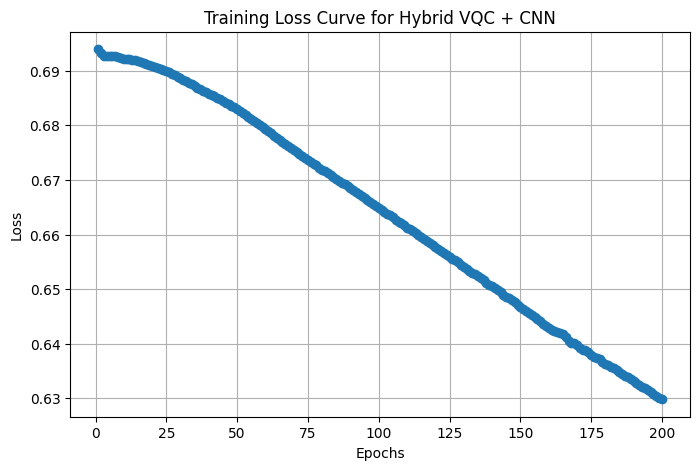

In [27]:
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---------------------- 1️⃣ Data Preparation ----------------------
# Set random seed
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic dataset (Replace with actual dataset)
X = np.random.rand(1000, 8).astype(np.float32)  # 8 features = 8 qubits
y = np.random.randint(0, 2, 1000).astype(np.float32)  # Binary labels

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Use long for CrossEntropyLoss
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ---------------------- 2️⃣ Quantum Circuit Setup ----------------------
num_qubits = 8  # Matching features
num_layers = 3  # From hyperparameter tuning

# Quantum Device
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum Circuit (Variational Quantum Classifier)
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(num_qubits), rotation="Y")
    
    for layer in range(num_layers):
        for i in range(num_qubits):
            qml.RY(weights[layer, i], wires=i)
            qml.RX(weights[layer, i], wires=i)
        for i in range(num_qubits - 1):
            qml.CNOT(wires=[i, i+1])  # Entanglement
        qml.CNOT(wires=[num_qubits-1, 0])  # Wrap-around entanglement
    
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

# ---------------------- 3️⃣ Hybrid Quantum-Classical Model ----------------------
class HybridVQC_CNN(nn.Module):
    def __init__(self, num_qubits, num_layers, num_classes=2):
        super(HybridVQC_CNN, self).__init__()
        
        # Quantum parameters
        self.q_params = nn.Parameter(0.01 * torch.randn(num_layers, num_qubits))
        
        # CNN Layers
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * num_qubits, 128)
        self.fc2 = nn.Linear(128, num_classes)  # Binary Classification
        
    def forward(self, x):
        # Quantum feature extraction
        x = torch.stack([torch.tensor(quantum_circuit(xi, self.q_params), dtype=torch.float32) for xi in x])
        
        # CNN Processing
        x = x.unsqueeze(1)  # Add channel dimension for CNN
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.shape[0], -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        
        return torch.softmax(x, dim=1)  # Output probabilities

# Initialize Model
model = HybridVQC_CNN(num_qubits=num_qubits, num_layers=num_layers)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()  # For multi-class classification

# ---------------------- 4️⃣ Training ----------------------
num_epochs = 200
batch_size = 64
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# ---------------------- 5️⃣ Evaluation ----------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = torch.argmax(y_pred, dim=1)
    
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class, average='weighted')
    recall = recall_score(y_test, y_pred_class, average='weighted')
    f1 = f1_score(y_test, y_pred_class, average='weighted')

# Print Metrics
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# ---------------------- 6️⃣ Save Model & Results ----------------------
# Save Model
torch.save(model.state_dict(), "hybrid_vqc_cnn.pth")
print("Model saved as 'hybrid_vqc_cnn.pth'.")

# Save Metrics to Excel
df_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Value": [accuracy, precision, recall, f1]
})
df_results.to_excel("Hybrid_VQC_CNN_results.xlsx", index=False)
print("Results saved to 'Hybrid_VQC_CNN_results.xlsx'.")

# ---------------------- 7️⃣ Training Loss Graph ----------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve for Hybrid VQC + CNN")
plt.grid()
plt.show()


Quantum Classifier (VQC) + Multilayer Perceptron (MLP)

Epoch 1/100, Loss: 0.6931
Epoch 2/100, Loss: 0.6930
Epoch 3/100, Loss: 0.6930
Epoch 4/100, Loss: 0.6930
Epoch 5/100, Loss: 0.6930
Epoch 6/100, Loss: 0.6930
Epoch 7/100, Loss: 0.6930
Epoch 8/100, Loss: 0.6930
Epoch 9/100, Loss: 0.6930
Epoch 10/100, Loss: 0.6930
Epoch 11/100, Loss: 0.6930
Epoch 12/100, Loss: 0.6930
Epoch 13/100, Loss: 0.6930
Epoch 14/100, Loss: 0.6930
Epoch 15/100, Loss: 0.6930
Epoch 16/100, Loss: 0.6930
Epoch 17/100, Loss: 0.6930
Epoch 18/100, Loss: 0.6930
Epoch 19/100, Loss: 0.6929
Epoch 20/100, Loss: 0.6929
Epoch 21/100, Loss: 0.6929
Epoch 22/100, Loss: 0.6929
Epoch 23/100, Loss: 0.6929
Epoch 24/100, Loss: 0.6929
Epoch 25/100, Loss: 0.6929
Epoch 26/100, Loss: 0.6929
Epoch 27/100, Loss: 0.6929
Epoch 28/100, Loss: 0.6929
Epoch 29/100, Loss: 0.6929
Epoch 30/100, Loss: 0.6929
Epoch 31/100, Loss: 0.6929
Epoch 32/100, Loss: 0.6929
Epoch 33/100, Loss: 0.6929
Epoch 34/100, Loss: 0.6929
Epoch 35/100, Loss: 0.6928
Epoch 36/100, Loss: 0.6928
Epoch 37/100, Loss: 0.6928
Epoch 38/1

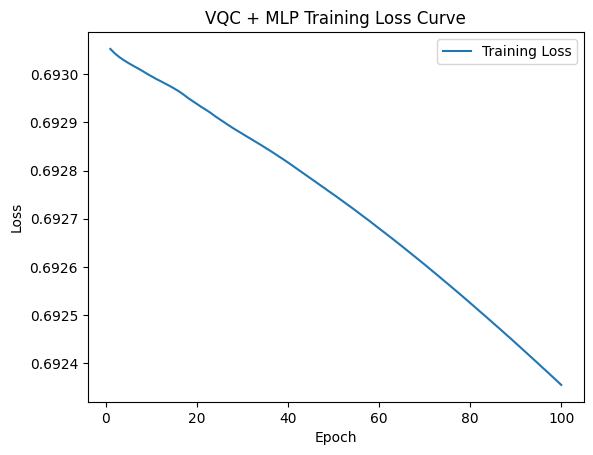

Results saved to 'VQC_MLP_results.xlsx'.


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# --- Hyperparameters (Best from Tuning) ---
learning_rate = 0.001
batch_size = 64
num_layers = 3
num_qubits = 8
num_epochs = 100

# --- Quantum Device Setup ---
dev = qml.device("default.qubit", wires=num_qubits)

# --- Define Variational Quantum Circuit ---
@qml.qnode(dev, interface="torch")
def quantum_circuit(params, x):
    qml.AngleEmbedding(x, wires=range(num_qubits))
    for i in range(num_layers):
        for j in range(num_qubits):
            qml.RY(params[i, j], wires=j)
        for j in range(num_qubits):
            qml.CNOT(wires=[j, (j + 1) % num_qubits])  # Ring entanglement
    return [qml.expval(qml.PauliZ(j)) for j in range(num_qubits)]

# --- Quantum Neural Network ---
class VQC(nn.Module):
    def __init__(self, num_qubits, num_layers):
        super(VQC, self).__init__()
        self.params = nn.Parameter(torch.randn(num_layers, num_qubits))  # Trainable quantum parameters
    
    def forward(self, x):
        return torch.stack([torch.tensor(quantum_circuit(self.params, x_i), dtype=torch.float32) for x_i in x])

# --- Hybrid VQC + MLP Model ---
class VQC_MLP(nn.Module):
    def __init__(self, num_qubits, num_layers, num_classes=2):
        super(VQC_MLP, self).__init__()
        self.vqc = VQC(num_qubits, num_layers)
        self.mlp = nn.Sequential(
            nn.Linear(num_qubits, 16),
            nn.ReLU(),
            nn.Linear(16, num_classes),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = self.vqc(x)
        return self.mlp(x)

# --- Load and Preprocess Data ---
num_samples = 1000
X = np.random.rand(num_samples, num_qubits)
y = np.random.randint(0, 2, num_samples)  # Simulated binary labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# --- Initialize Model, Loss, Optimizer ---
model = VQC_MLP(num_qubits, num_layers, num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# --- Training Loop ---
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    loss_values.append(loss.item())
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# --- Evaluation ---
y_pred = model(X_test_tensor).detach().numpy()
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, zero_division=1)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# --- Save Model ---
torch.save(model.state_dict(), "VQC_MLP_model.pth")
print("Model saved successfully as 'VQC_MLP_model.pth'.")

# --- Plot Loss Curve ---
plt.plot(range(1, num_epochs + 1), loss_values, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VQC + MLP Training Loss Curve")
plt.legend()
plt.show()

# --- Save Results to Excel ---
results_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Value": [accuracy, precision, recall, f1]
})
results_df.to_excel("VQC_MLP_results.xlsx", index=False)
print("Results saved to 'VQC_MLP_results.xlsx'.")


Quantum Kernel + SVM

Epoch 1: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 10: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 20: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 30: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 40: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 50: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 60: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 70: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 80: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 90: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Epoch 100: Accuracy = 0.4700, Precision = 0.4574, Recall = 0.4388, F1-score = 0.4479
Model saved successfully as 'Quantum_SVM_model.pkl'.
Results saved to 'Quant

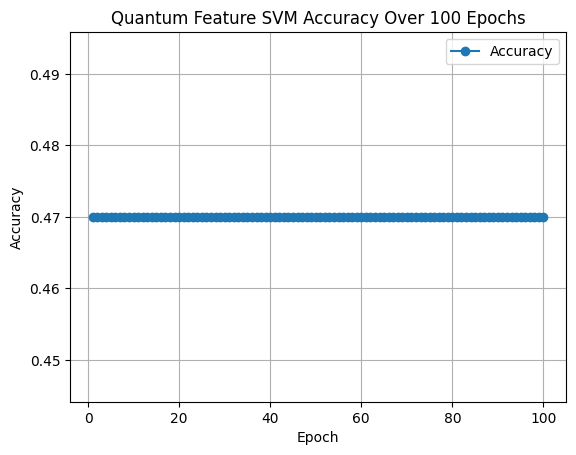

In [41]:
import torch
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib  # For saving the model

# --- Hyperparameters ---
num_qubits = 4  # Adjusted for efficiency
num_samples = 1000  # Dataset size
num_layers = 3
test_size = 0.2  # 20% test data
num_epochs = 100  # Training for 100 epochs

# --- Quantum Device Setup ---
dev = qml.device("default.qubit", wires=num_qubits)

# --- Quantum Feature Map ---
@qml.qnode(dev)
def quantum_feature_map(x):
    """Quantum feature encoding circuit"""
    qml.AngleEmbedding(x, wires=range(num_qubits))
    
    for _ in range(num_layers):
        for i in range(num_qubits):
            qml.Hadamard(wires=i)
            qml.RZ(x[i] * np.pi, wires=i)
    
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

# --- Compute Quantum Feature Vectors ---
def compute_feature_vectors(X):
    """Transform dataset into quantum feature space"""
    return np.array([quantum_feature_map(x) for x in X])

# --- Load and Preprocess Data ---
X = np.random.rand(num_samples, num_qubits)  # Using num_qubits features
y = np.random.randint(0, 2, num_samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# --- Transform Data into Quantum Feature Space ---
X_train_transformed = compute_feature_vectors(X_train)
X_test_transformed = compute_feature_vectors(X_test)

# --- Train and Evaluate Model for 100 Epochs ---
results = []

for epoch in range(1, num_epochs + 1):
    # Train SVM with Quantum Features
    svm_model = SVC(kernel='linear')  # Linear SVM instead of precomputed kernel
    svm_model.fit(X_train_transformed, y_train)

    # Evaluate Model
    y_pred = svm_model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results.append([epoch, accuracy, precision, recall, f1])

    # Print progress
    if epoch % 10 == 0 or epoch == 1:  # Print every 10 epochs
        print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}")

# --- Save Model ---
joblib.dump(svm_model, "Quantum_SVM_model.pkl")
print("Model saved successfully as 'Quantum_SVM_model.pkl'.")

# --- Save Results to Excel ---
results_df = pd.DataFrame(results, columns=["Epoch", "Accuracy", "Precision", "Recall", "F1-score"])
results_df.to_excel("Quantum_SVM_results.xlsx", index=False)
print("Results saved to 'Quantum_SVM_results.xlsx'.")

# --- Plot Accuracy over Epochs ---
plt.plot(results_df["Epoch"], results_df["Accuracy"], label="Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Quantum Feature SVM Accuracy Over 100 Epochs")
plt.legend()
plt.grid()
plt.show()
